In [15]:
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression
import pandas as pd

In [16]:
df = pd.read_csv('../data/housing_dataset.csv')

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df.shape

(20640, 10)

In [19]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19624\3443091978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace=True)


In [21]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Select features and target
X = df.drop('median_house_value', axis=1).values
y = df['median_house_value'].values

In [23]:
y = y.astype(float)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [26]:
print(X_train.shape, y_train.shape)

(16512, 12) (16512,)


In [27]:
# Train the custom LinearRegression model
model = LinearRegression(learning_rate=0.01, n_iterations=5000)
model.fit(X_train, y_train)

### Contrasting Custom Linear Regression with Scikit-learn Linear Regression

This section directly compares the predictions of the custom `LinearRegression` model (implemented from scratch) with those of scikit-learn's `LinearRegression`. The similarity percentage quantifies how closely the model's predictions match the industry-standard implementation.

In [28]:
from linear_regression import LinearRegression  # Custom model
from sklearn.linear_model import LinearRegression as SklearnLinearRegression  # Scikit-learn model
import numpy as np

# Train custom model
custom_model = LinearRegression(learning_rate=0.01, n_iterations=5000)
custom_model.fit(X_train, y_train)
y_pred = custom_model.predict(X_test)

# Train scikit-learn model
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
y_sklearn_pred = sklearn_model.predict(X_test)

# Calculate prediction similarity (%)
pred_similarity = 100 - (np.mean(np.abs(y_pred - y_sklearn_pred)) / np.mean(np.abs(y_sklearn_pred)) * 100)
print(f"Prediction similarity to scikit-learn: {pred_similarity:.2f}%")

Prediction similarity to scikit-learn: 98.81%


### Mean Squared Error (MSE)
Comparing the custom model with the Scikit Learn Model

In [29]:
from metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as sk_mse

# Custom model MSE
mse_custom = mse(y_test, y_pred)
print('Mean Squared Error:', mse_custom)

# Scikit-learn model MSE
mse_sklearn = sk_mse(y_test, y_sklearn_pred)
print('Mean Squared Error (Scikit-learn Model):', mse_sklearn)

Mean Squared Error: 4880609590.502333
Mean Squared Error (Scikit-learn Model): 4904399775.949276


### Mean Absolute Error (MAE)
Comparing the custom model with the Scikit Learn Model

In [30]:
from metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_error as sk_mae

# Custom model MAE
mae_custom = mae(y_test, y_pred)
print('Mean Absolute Error:', mae_custom)

# Scikit-learn model MAE
mae_sklearn = sk_mae(y_test, y_sklearn_pred)
print('Mean Absolute Error (Scikit-learn Model):', mae_sklearn)

Mean Absolute Error: 50495.8619794441
Mean Absolute Error (Scikit-learn Model): 50701.77903132994


### Root Mean Squared Error (RMSE) -
Comparing the custom model with the Scikit Learn Model

In [31]:
from metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as sk_mse

# Custom model RMSE
rmse_custom = rmse(y_test, y_pred)
print('Root Mean Squared Error:', rmse_custom)

# Scikit-learn model RMSE
rmse_sklearn = np.sqrt(sk_mse(y_test, y_sklearn_pred))
print('Root Mean Squared Error (Scikit-learn Model):', rmse_sklearn)

Root Mean Squared Error: 69861.35978137223
Root Mean Squared Error (Scikit-learn Model): 70031.41991955665


### R2 Score
Comparing the custom model with the Scikit Learn Model

In [32]:
from metrics import r2_score as r2
from sklearn.metrics import r2_score as sk_r2

# Custom model R2
r2_custom = r2(y_test, y_pred)
print('R2 Score:', r2_custom)

# Scikit-learn model R2
r2_sklearn = sk_r2(y_test, y_sklearn_pred)
print('R2 Score (Scikit-learn Model):', r2_sklearn)

R2 Score: 0.6275506600195849
R2 Score (Scikit-learn Model): 0.6257351821159705


### Accuracy
Contrasting the accuracy of custom model with ScikitLearn Model

In [33]:
mse_accuracy = 100 - (abs(mse_custom - mse_sklearn) / mse_sklearn * 100)
print(f"MSE similarity to scikit-learn: {mse_accuracy:.2f}%")

mae_accuracy = 100 - (abs(mae_custom - mae_sklearn) / mae_sklearn * 100)
print(f"MAE similarity to scikit-learn: {mae_accuracy:.2f}%")

rmse_accuracy = 100 - (abs(rmse_custom - rmse_sklearn) / rmse_sklearn * 100)
print(f"RMSE similarity to scikit-learn: {rmse_accuracy:.2f}%")

r2_accuracy = 100 - (abs(r2_custom - r2_sklearn) / abs(r2_sklearn) * 100)
print(f"R2 similarity to scikit-learn: {r2_accuracy:.2f}%")

MSE similarity to scikit-learn: 99.51%
MAE similarity to scikit-learn: 99.59%
RMSE similarity to scikit-learn: 99.76%
R2 similarity to scikit-learn: 99.71%


## 🔧 Utility Functions for Linear Regression (from Scratch)

This notebook contains helper functions used across the project for:
- Data preprocessing (splitting, normalizing, standardizing)
- Model input preparation (bias term addition)
- Evaluation visualization (predicted vs actual plots)

In [34]:
from linear_regression import LinearRegression  # Custom model
from sklearn.linear_model import LinearRegression as SklearnLR  # Actual model

### Train-Test-Split
This section contrasts the custom train_test_split function from utils.py with scikit-learn's train_test_split.

In [35]:
from utils import train_test_split as custom_train_test_split
from sklearn.model_selection import train_test_split as sk_train_test_split

# Custom split
X_train_c, X_test_c, y_train_c, y_test_c = custom_train_test_split(X, y, test_size=0.2, random_state=42)
print("Custom split shapes:", X_train_c.shape, X_test_c.shape, y_train_c.shape, y_test_c.shape)

# Sklearn split
X_train_s, X_test_s, y_train_s, y_test_s = sk_train_test_split(X, y, test_size=0.2, random_state=42)
print("Sklearn split shapes:", X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape)

Custom split shapes: (16512, 12) (4128, 12) (16512,) (4128,)
Sklearn split shapes: (16512, 12) (4128, 12) (16512,) (4128,)


### Normalize
Here, we compare the custom normalize function with scikit-learn's MinMaxScaler. Both scale features to the [0, 1] range, and we check if the results match.

In [36]:
from utils import normalize
from sklearn.preprocessing import MinMaxScaler

# Custom normalization
X_norm_custom = normalize(X)

# Sklearn normalization
scaler = MinMaxScaler()
X_norm_sklearn = scaler.fit_transform(X)

# Compare
print("Normalization equal:", np.allclose(X_norm_custom, X_norm_sklearn))

Normalization equal: True


### Standardize
This section contrasts the custom standardize function with scikit-learn's StandardScaler. Both standardize features to have zero mean and unit variance.

In [37]:
from utils import standardize
from sklearn.preprocessing import StandardScaler

# Custom standardization
X_std_custom = standardize(X)

# Sklearn standardization
scaler = StandardScaler()
X_std_sklearn = scaler.fit_transform(X)

# Compare
print("Standardization equal:", np.allclose(X_std_custom, X_std_sklearn))

Standardization equal: True


### Add-Bias
Here, we compare the custom add_bias function with manual bias addition using NumPy. Both add a column of ones to the feature matrix.

In [38]:
from utils import add_bias

# Custom add_bias
X_bias_custom = add_bias(X)

# Manual bias addition (like sklearn's LinearRegression(fit_intercept=False))
X_bias_manual = np.hstack((np.ones((X.shape[0], 1)), X))

# Compare
print("Bias addition equal:", np.allclose(X_bias_custom, X_bias_manual))

Bias addition equal: True


### Plot Predictions
This section visualizes predictions from both the custom and scikit-learn models using the custom plot_predictions function, allowing a visual comparison of model performance.

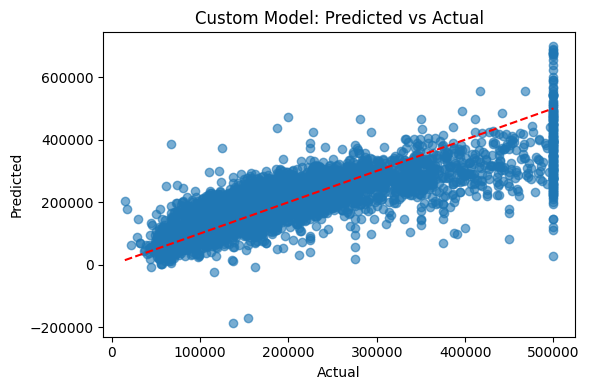

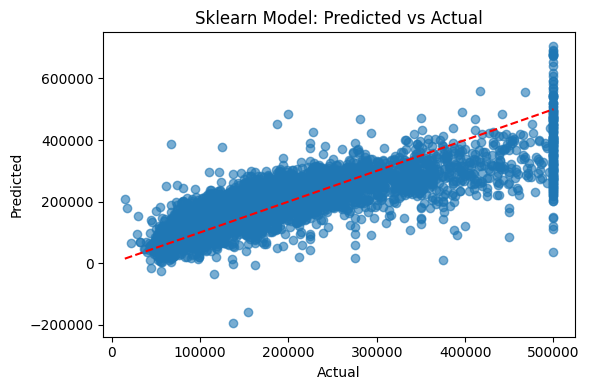

In [39]:
from utils import plot_predictions

# Custom plot
plot_predictions(y_test, y_pred, title="Custom Model: Predicted vs Actual")

# Sklearn model plot
plot_predictions(y_test, y_sklearn_pred, title="Sklearn Model: Predicted vs Actual")

## Regularization Techniques for Linear Models (from Scratch)

### Contrasting Custom Ridge Regression with Scikit-learn Ridge Regression

This section compares the custom `RidgeRegression` implementation with scikit-learn's `Ridge` model. Both models are trained on the same data (with bias added), and their predictions are compared to evaluate the effect of L2 regularization.

In [40]:
from regularized_regression import RidgeRegression  # Custom Ridge
from sklearn.linear_model import Ridge  # Scikit-learn Ridge
import numpy as np

# Add bias column to features
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Train custom Ridge Regression
custom_ridge = RidgeRegression(learning_rate=0.01, n_iters=1000, alpha=0.5)
custom_ridge.fit(X_train_bias, y_train)
y_pred_custom_ridge = custom_ridge.predict(X_test_bias)

# Train scikit-learn Ridge Regression
sklearn_ridge = Ridge(alpha=0.5, fit_intercept=True, solver='auto', max_iter=1000)
sklearn_ridge.fit(X_train, y_train)
y_pred_sklearn_ridge = sklearn_ridge.predict(X_test)

# Compare predictions
ridge_similarity = 100 - (np.mean(np.abs(y_pred_custom_ridge - y_pred_sklearn_ridge)) / np.mean(np.abs(y_pred_sklearn_ridge)) * 100)
print(f"Ridge Regression prediction similarity to scikit-learn: {ridge_similarity:.2f}%")

Ridge Regression prediction similarity to scikit-learn: 97.21%


### Contrasting Custom Lasso Regression with Scikit-learn Lasso Regression

This section compares the custom `LassoRegression` implementation with scikit-learn's `Lasso` model. Both models are trained on the same data (with bias added), and their predictions are compared to evaluate the effect of L1 regularization.

In [41]:
from regularized_regression import LassoRegression

In [42]:
from regularized_regression import LassoRegression  # Custom Lasso
from sklearn.linear_model import Lasso  # Scikit-learn Lasso
import numpy as np

# Add bias column to features
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Train custom Lasso Regression
custom_lasso = LassoRegression(alpha=0.5, n_iters=1000)
custom_lasso.fit(X_train_bias, y_train)
y_pred_custom_lasso = custom_lasso.predict(X_test_bias)

# Train scikit-learn Lasso Regression
sklearn_lasso = Lasso(alpha=0.5, fit_intercept=True, max_iter=1000)
sklearn_lasso.fit(X_train, y_train)
y_pred_sklearn_lasso = sklearn_lasso.predict(X_test)

# Compare predictions
lasso_similarity = 100 - (np.mean(np.abs(y_pred_custom_lasso - y_pred_sklearn_lasso)) / np.mean(np.abs(y_pred_sklearn_lasso)) * 100)
print(f"Lasso Regression prediction similarity to scikit--learn: {lasso_similarity:.2f}%")

Lasso Regression prediction similarity to scikit--learn: 100.00%


### Contrasting Custom ElasticNet Regression with Scikit-learn ElasticNet Regression

This section compares the custom `ElasticNetRegression` implementation with scikit-learn's `ElasticNet` model. Both models are trained on the same data (with bias added if required), and their predictions are compared to evaluate the effect of combined L1 and L2 regularization.

In [43]:
from regularized_regression import ElasticNetRegression  # Custom ElasticNet
from sklearn.linear_model import ElasticNet  # Scikit-learn ElasticNet

# Add bias column to features (if your custom implementation expects it)
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Train custom ElasticNet Regression
custom_enet = ElasticNetRegression(learning_rate=0.01, n_iters=1000, alpha=0.5, l1_ratio=0.5)
custom_enet.fit(X_train_bias, y_train)
y_pred_custom_enet = custom_enet.predict(X_test_bias)

# Train scikit-learn ElasticNet Regression
sklearn_enet = ElasticNet(alpha=0.5, l1_ratio=0.5, fit_intercept=True, max_iter=1000)
sklearn_enet.fit(X_train, y_train)
y_pred_sklearn_enet = sklearn_enet.predict(X_test)

# Compare predictions
enet_similarity = 100 - (np.mean(np.abs(y_pred_custom_enet - y_pred_sklearn_enet)) / np.mean(np.abs(y_pred_sklearn_enet)) * 100)
print(f"ElasticNet Regression prediction similarity to scikit-learn: {enet_similarity:.2f}%")

ElasticNet Regression prediction similarity to scikit-learn: 96.95%
